<a href="https://colab.research.google.com/github/IamRabin/AI_for_healthcare/blob/master/EEG_Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/pbashivan/EEGLearn.git"

fatal: destination path 'EEGLearn' already exists and is not an empty directory.


In [ ]:
!pip install -r "/content/EEGLearn/requirements.txt"

In [1]:
!git clone https://github.com/VDelv/EEGLearn-Pytorch.git

Cloning into 'EEGLearn-Pytorch'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 150 (delta 25), reused 25 (delta 7), pack-reused 91
Receiving objects: 100% (150/150), 69.91 MiB | 42.61 MiB/s, done.
Resolving deltas: 100% (26/26), done.


# Libraries Import

In [2]:

import numpy as np 
import scipy.io as sio
import torch
import os 
import matplotlib.pyplot as plt


import torch.optim as optim
import torch.nn.functional as F

from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader,random_split

from EEGLearnPytorch.Models import *
from EEGLearnPytorch.Utils import *


torch.manual_seed(1234)
np.random.seed(1234)

import warnings
warnings.simplefilter("ignore")

#Load original Images

In [3]:
def create_img():
    feats = sio.loadmat("/content/EEGLearnPytorch/Sample Data/FeatureMat_timeWin.mat")['features']
    locs = sio.loadmat("/content/EEGLearnPytorch/Sample Data/Neuroscan_locs_orig.mat")
    locs_3d = locs['A']
    locs_2d = []
    # Convert to 2D
    for e in locs_3d:
        locs_2d.append(azim_proj(e))

    images_timewin = np.array([gen_images(np.array(locs_2d),
                                          feats[:, i * 192:(i + 1) * 192], 32, normalize=True) for i in
                               range(int(feats.shape[1] / 192))
                               ])

    sio.savemat("/content/EEGLearnPytorch/Sample Data/images_time.mat",{"img":images_timewin})
    print("Images Created and Save in EEGLearnPytorch/Sample Dat/images_time")

In [4]:
create_img()

Images Created and Save in EEGLearnPytorch/Sample Dat/images_time


In [ ]:
Mean_Images = sio.loadmat("./EEGLearnPytorch/Sample Data/images.mat")["img"] #corresponding to the images mean for all the seven windows
print(np.shape(Mean_Images)) 
Images = sio.loadmat("./EEGLearnPytorch/Sample Data/images_time.mat")["img"] #corresponding to the images mean for all the seven windows
print(np.shape(Images)) 
Label = (sio.loadmat("./EEGLearnPytorch/Sample Data/FeatureMat_timeWin")["features"][:,-1]-1).astype(int) #corresponding to the signal label (i.e. load levels).
print(np.shape(Label)) 
Patient_id = sio.loadmat("./EEGLearnPytorch/Sample Data/trials_subNums.mat")['subjectNum'][0] #corresponding to the patient id
print(np.shape(Patient_id))

(2670, 3, 32, 32)
(7, 2670, 3, 32, 32)
(2670,)
(2670,)


In [ ]:
Images=np.transpose(Images, (1,0,2,3,4))

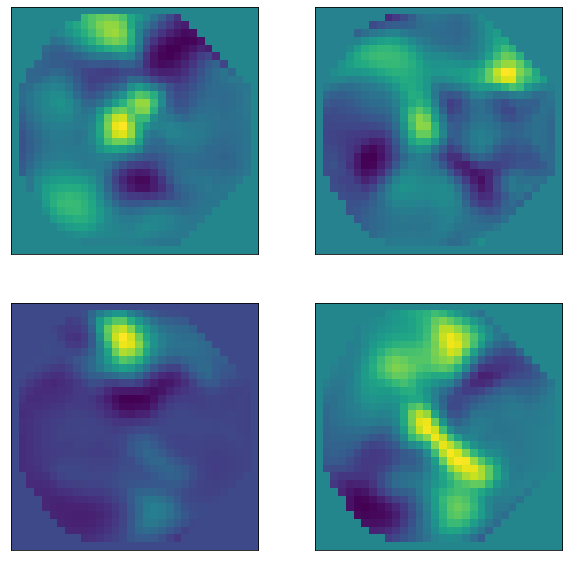

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i,0,0,:,:])
    
plt.show()

In [ ]:
print("Choose among the patient : "+str(np.unique(Patient_id)))


Choose among the patient : [ 1  2  3  4  6  7  8  9 10 11 12 14 15]


In [ ]:
choosen_patient = 9


In [ ]:
train_part = 0.8
test_part = 0.2

batch_size = 32

In [ ]:

EEG = EEGImagesDataset(label=Label[Patient_id==choosen_patient], image=Mean_Images[Patient_id==choosen_patient])

lengths = [int(len(EEG)*train_part+1), int(len(EEG)*test_part)]
Train, Test = random_split(EEG, lengths)

Trainloader = DataLoader(Train,batch_size=batch_size)
Testloader = DataLoader(Test, batch_size=batch_size)

In [ ]:
a=next(iter(Trainloader))
a[0].shape

torch.Size([32, 3, 32, 32])

In [ ]:
res = TrainTest_Model(BasicCNN, Trainloader, Testloader, n_epoch=50, learning_rate=0.001, print_epoch=-1, opti='Adam')

In [ ]:
train_part = 0.8
test_part = 0.2

batch_size = 32

In [ ]:

EEG = EEGImagesDataset(label=Label[Patient_id==choosen_patient], image=Images[Patient_id==choosen_patient])

lengths = [int(len(EEG)*train_part+1), int(len(EEG)*test_part)]
Train, Test = random_split(EEG, lengths)

Trainloader = DataLoader(Train,batch_size=batch_size)
Testloader = DataLoader(Test, batch_size=batch_size)

IndexError: ignored

In [ ]:
print('Begin Training for Patient '+str(choosen_patient))
res = TrainTest_Model(MaxCNN, Trainloader, Testloader, n_epoch=45, learning_rate=0.001, print_epoch=5, opti='Adam')

Begin Training for Patient 9
[5,  45]	loss: 0.841	Accuracy : 0.574		val-loss: 1.036	val-Accuracy : 0.675
[10,  45]	loss: 0.217	Accuracy : 0.889		val-loss: 0.978	val-Accuracy : 0.725
[15,  45]	loss: 0.200	Accuracy : 0.963		val-loss: 0.629	val-Accuracy : 0.775
[20,  45]	loss: 0.093	Accuracy : 0.969		val-loss: 0.686	val-Accuracy : 0.850
[25,  45]	loss: 0.025	Accuracy : 0.994		val-loss: 0.876	val-Accuracy : 0.850
[30,  45]	loss: 0.016	Accuracy : 0.994		val-loss: 1.035	val-Accuracy : 0.825
[35,  45]	loss: 0.009	Accuracy : 0.994		val-loss: 1.175	val-Accuracy : 0.850
[40,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.619	val-Accuracy : 0.850
[45,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.743	val-Accuracy : 0.875


In [ ]:

print('Begin Training for Patient '+str(choosen_patient))
res = TrainTest_Model(TempCNN, Trainloader, Testloader, n_epoch=45, learning_rate=0.001, print_epoch=5, opti='Adam')

Begin Training for Patient 9
[5,  45]	loss: 0.295	Accuracy : 0.901		val-loss: 0.472	val-Accuracy : 0.800
[10,  45]	loss: 0.109	Accuracy : 0.963		val-loss: 0.283	val-Accuracy : 0.925
[15,  45]	loss: 0.004	Accuracy : 1.000		val-loss: 0.789	val-Accuracy : 0.900
[20,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.767	val-Accuracy : 0.950
[25,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.871	val-Accuracy : 0.950
[30,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.015	val-Accuracy : 0.925
[35,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.054	val-Accuracy : 0.925
[40,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.104	val-Accuracy : 0.925
[45,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 1.131	val-Accuracy : 0.925


Temp CNN

In [ ]:
print('Begin Training for Patient '+str(choosen_patient))
res = TrainTest_Model(TempCNN, Trainloader, Testloader, n_epoch=45, learning_rate=0.001, print_epoch=5, opti='Adam')

Begin Training for Patient 9
[5,  45]	loss: 0.606	Accuracy : 0.809		val-loss: 0.443	val-Accuracy : 0.800
[10,  45]	loss: 0.027	Accuracy : 0.994		val-loss: 0.142	val-Accuracy : 0.875
[15,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.142	val-Accuracy : 0.950
[20,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.205	val-Accuracy : 0.950
[25,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.236	val-Accuracy : 0.950
[30,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.267	val-Accuracy : 0.950
[35,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.286	val-Accuracy : 0.950
[40,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.304	val-Accuracy : 0.950
[45,  45]	loss: 0.000	Accuracy : 1.000		val-loss: 0.316	val-Accuracy : 0.950


# Mix CNN

In [ ]:
EEG = EEGImagesDataset(label=Label[Patient_id==choosen_patient], image=Images[Patient_id==choosen_patient])

lengths = [int(len(EEG)*train_part+1), int(len(EEG)*test_part)]
Train, Test = random_split(EEG, lengths)

Trainloader = DataLoader(Train,batch_size=batch_size)
Testloader = DataLoader(Test, batch_size=batch_size)


In [ ]:
print('Begin Training for Patient '+str(choosen_patient))
res = TrainTest_Model(Mix, Trainloader, Testloader, n_epoch=60, learning_rate=0.00001, print_epoch=5, opti='Adam')

Begin Training for Patient 9
[5,  60]	loss: 1.358	Accuracy : 0.296		val-loss: 1.387	val-Accuracy : 0.250
[10,  60]	loss: 1.339	Accuracy : 0.296		val-loss: 1.390	val-Accuracy : 0.250
[15,  60]	loss: 1.325	Accuracy : 0.296		val-loss: 1.393	val-Accuracy : 0.250
[20,  60]	loss: 1.300	Accuracy : 0.333		val-loss: 1.378	val-Accuracy : 0.300
[25,  60]	loss: 1.218	Accuracy : 0.568		val-loss: 1.288	val-Accuracy : 0.475
[30,  60]	loss: 1.054	Accuracy : 0.568		val-loss: 1.100	val-Accuracy : 0.475
[35,  60]	loss: 0.912	Accuracy : 0.580		val-loss: 0.971	val-Accuracy : 0.475
[40,  60]	loss: 0.797	Accuracy : 0.605		val-loss: 0.876	val-Accuracy : 0.500
[45,  60]	loss: 0.693	Accuracy : 0.667		val-loss: 0.797	val-Accuracy : 0.600
[50,  60]	loss: 0.593	Accuracy : 0.772		val-loss: 0.718	val-Accuracy : 0.750
[55,  60]	loss: 0.486	Accuracy : 0.809		val-loss: 0.633	val-Accuracy : 0.750
[60,  60]	loss: 0.378	Accuracy : 0.870		val-loss: 0.549	val-Accuracy : 0.775


#Captum


In [ ]:
!pip install captum

     |████████████████████████████████| 4.4MB 28.0MB/s 


In [ ]:
from captum.attr import visualization as viz
from captum.attr import FeatureAblation

from PIL import Image
import matplotlib.pyplot as plt